In [15]:
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from Functions import *
import time

In [23]:
n_sites = 11
h = 1.0
J = 1.0

H = get_sparse_pure_hamiltonian(n_sites,J,h)

In [19]:
# Lowest eigenvalue 

eigvals = eigsh(H,k=1,which='SA',return_eigenvectors=False)
eigvals

array([-16.69189335])

6.917520999908447


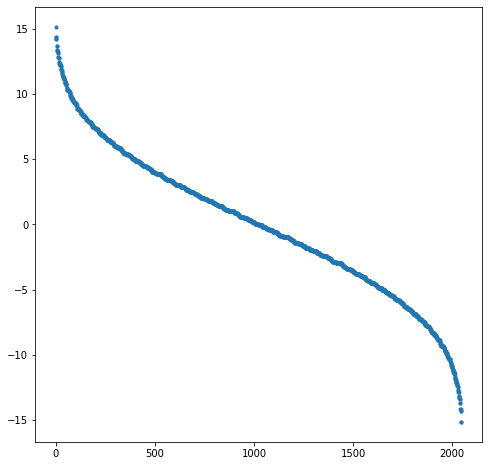

In [24]:
# Distribution of eigenvalues

ti = time.time()
eigvals = eigsh(H,k=2**(n_sites)-1,which='SA',return_eigenvectors=False)
tf = time.time()

print(tf-ti)

plt.figure(figsize=(8,8))
plt.plot(eigvals,'.')

In [48]:
# Dependence with J,h
n = 100

n_sites = 10
h = np.linspace(-1,1,n)
J = np.linspace(-1,1,n)

G = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        G[i,j] = get_ground_state_energy(get_sparse_pure_hamiltonian(n_sites,J[j],h[i]))
        

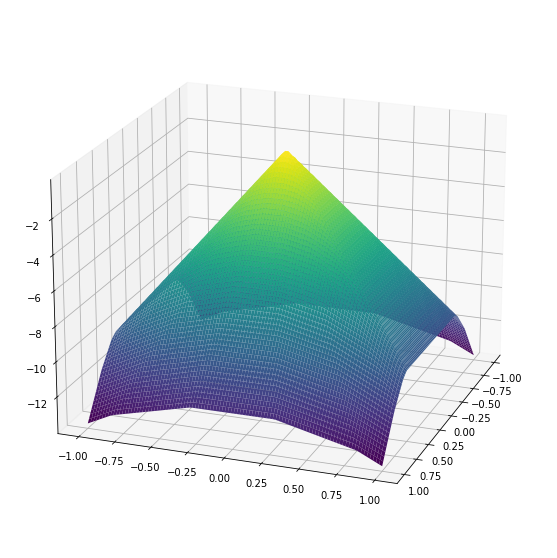

In [51]:
X,Y = np.meshgrid(h,J)
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, G, rstride=1, cstride=1, cmap='viridis')
ax.view_init(20, 20)